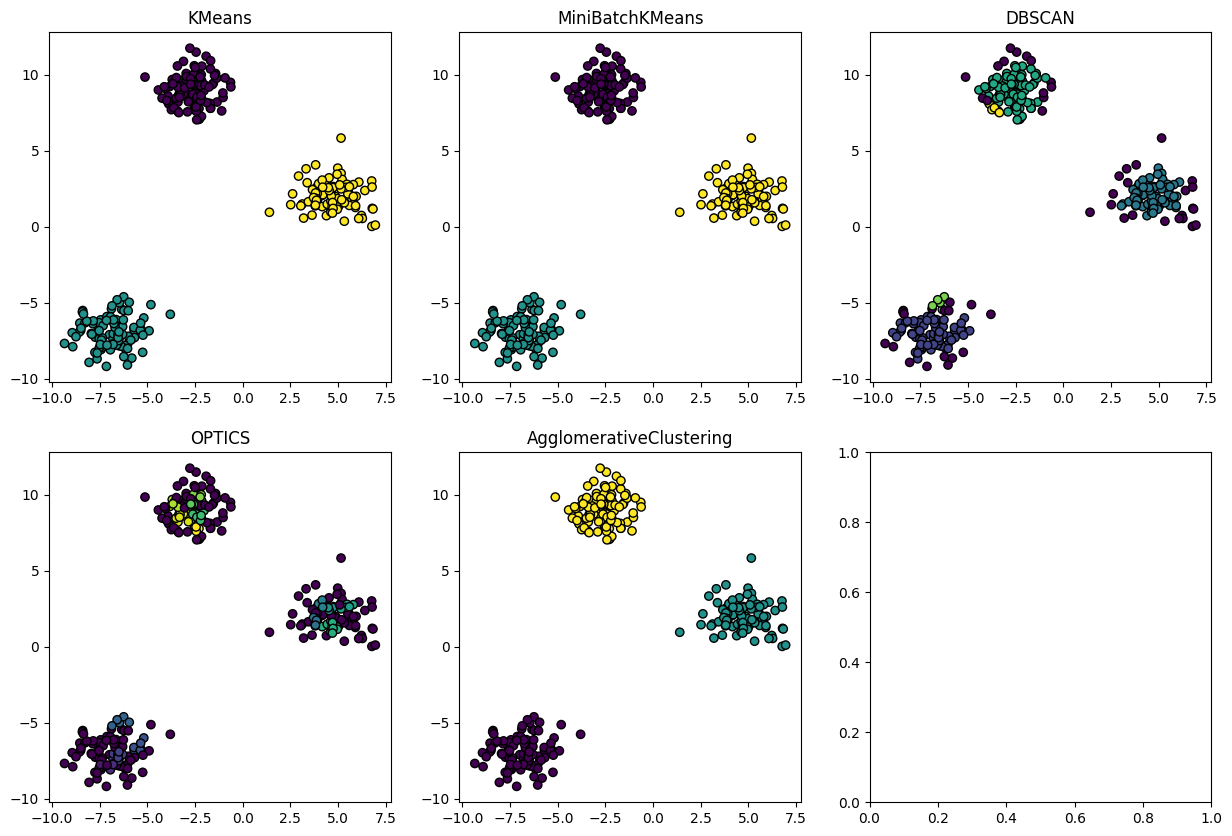

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, MiniBatchKMeans, DBSCAN, OPTICS, AgglomerativeClustering
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.datasets import make_blobs

# Generate sample data
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

# 4.1. Clustering
# Partitioning Clustering
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
minibatch_kmeans = MiniBatchKMeans(n_clusters=3, random_state=42).fit(X)

# Density-Based Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5).fit(X)
optics = OPTICS(min_samples=5).fit(X)

# Hierarchical Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3).fit(X)

# 4.2. Anomaly Detection
# Isolation Forest
isolation_forest = IsolationForest(contamination=0.1, random_state=42).fit(X)
isolation_preds = isolation_forest.predict(X)

# Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
lof_preds = lof.fit_predict(X)

# One-Class SVM
ocsvm = OneClassSVM(nu=0.1, kernel='rbf').fit(X)
ocsvm_preds = ocsvm.predict(X)

# Plot clustering results
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
algorithms = [
    (kmeans.labels_, "KMeans"),
    (minibatch_kmeans.labels_, "MiniBatchKMeans"),
    (dbscan.labels_, "DBSCAN"),
    (optics.labels_, "OPTICS"),
    (agg_clustering.labels_, "AgglomerativeClustering")
]
for ax, (labels, title) in zip(axes.flat, algorithms):
    ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolor='k')
    ax.set_title(title)
plt.show()
